In [80]:
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline
import matplotlib.pyplot as plt

In [81]:
b = datasets.load_breast_cancer()
X = b.data
y = b.target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [83]:
#descision tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
dt.score(X_test,y_test)

0.9300699300699301

In [85]:
dt.score(X_train,y_train)

1.0

In [86]:
#Random Forest

rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [87]:
rf.score(X_test,y_test)

0.9440559440559441

In [88]:
#Bagging 
estimator_range = [1] + list(range(10, 150,  20))
scores = []
for e in estimator_range:
    bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 100, n_estimators = e)
    bg.fit(X_train,y_train)
    scores.append(bg.score(X_test,y_test))

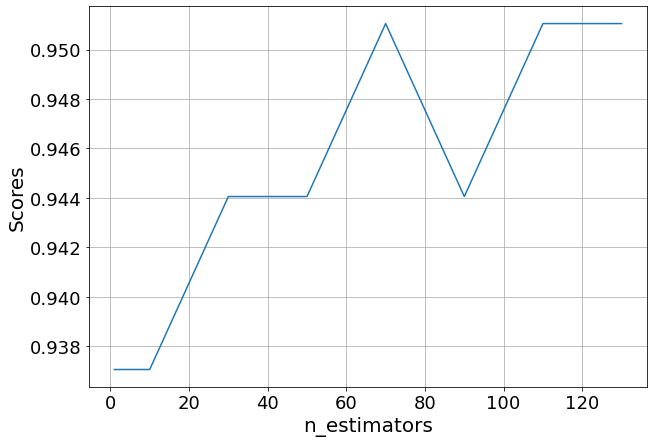

In [89]:
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, scores)
plt.xlabel("n_estimators", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.tick_params(labelsize=18)
plt.grid()

In [90]:
bg.score(X_test,y_test)

0.951048951048951

In [91]:
bg.score(X_train,y_train)

0.9765258215962441

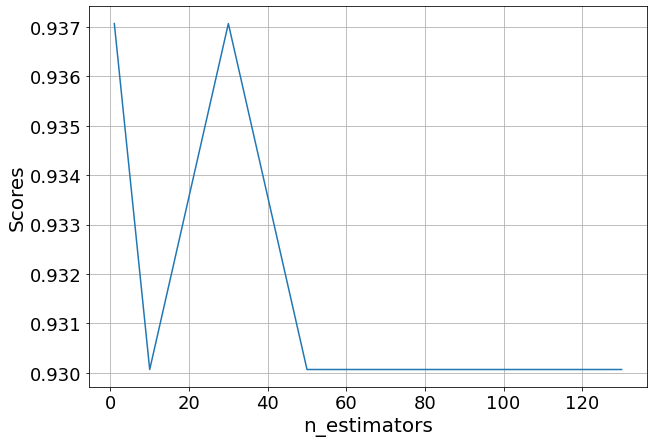

In [92]:
#Boosting - Ada Boost

estimator_range = [1] + list(range(10, 150,  20))
scores = []
for e in estimator_range:
    bg = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = e)
    bg.fit(X_train,y_train)
    scores.append(bg.score(X_test,y_test))

plt.figure(figsize=(10, 7))
plt.plot(estimator_range, scores)
plt.xlabel("n_estimators", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.tick_params(labelsize=18)
plt.grid()

In [93]:
adb.score(X_test,y_test)   #slightly lower than bagging score

0.9300699300699301

In [95]:
# Voting Classifier - Multiple Model Ensemble 

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [96]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [97]:
evc.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(degree=2, kernel='poly'))])

In [98]:
evc.score(X_test, y_test)

0.9370629370629371